<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

<a id='top'></a>
[Q1](#q1) | [Q2](#q2) | [Q3](#q3)

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---
### Step 1: <a id='q1'></a>
Performing cleaning, feature engineering, and EDA necessary.
<br>*Note*: Some feature engineering is done later in the parts below.

In [3]:
# To see the columns
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Identifying important house features into categories:
<br>Neighbourhood: MSSubClass, MSZoning, Street, Neighborhood, Condition1, Condition2
<br>Lot: LotFrontage, LotArea, LotShape, Alley, LandContour, LotConfig, LandSlope
<br>House: BldgType, HouseStyle, YearBuilt, MasVnrType, MasVnrArea
<br>Roof: RoofStyle, RoofMatl
<br>Basement: BsmtExposure, TotalBsmtSF
<br>Built Utilities: Heating, CentralAir, Electrical, Utilities
<br>Space: 1stFlrSF, 2ndFlrSF, GrLivArea, TotRmsAbvGrd, BedroomAbvGr, KitchenAbvGr
<br>Garage: GarageYrBlt, GarageArea

In [5]:
# Checking number of null values in each column
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [6]:
# Drop ID
house.drop(columns=["Id"], axis=1, inplace=True)

In [7]:
# Checking if LotFrontage and LotArea are linked. (ie LotFrontage 0 = no lots?)
house[house["LotFrontage"].isnull()][["LotFrontage", "LotArea"]].sample(5)
# Conclusion: LotFrontage = null does not mean LotArea = 0.

,LotFrontage,LotArea
1251,NaN,3136
791,NaN,11333
720,NaN,6563
1206,NaN,8900
1253,NaN,17542


In [8]:
# Checking values of Alley
house["Alley"].value_counts()
# Conclusion: NaN values imply that there is no alley. To create dummy variable.

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [9]:
# Checking values of PoolQC
house[(house["PoolQC"].isnull()) & (house["PoolArea"] != 0)][["PoolQC", "PoolArea"]]
# Conclusion: PoolQC = null implies PoolArea = 0

,PoolQC,PoolArea


In [10]:
# Checking values of Fence
house["Fence"].unique()
# Conclusion: NaN implies no fence. To create dummy variable.

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [11]:
# Checking values of GarageType
house[(house["GarageType"].isnull()) & (house["GarageArea"] != 0)][["GarageType", "GarageArea"]]
# Conclusion: Null values of GarageType, GarageYrBlt and GarageFinish means that there is no Garage.

,GarageType,GarageArea


In [12]:
num_features = house.dtypes[house.dtypes != "object"].index
cat_features = house.dtypes[house.dtypes == "object"].index
print("There are", len(num_features), "numerical columns and", len(cat_features), "object columns.")

There are 37 numerical columns and 43 object columns.


In [13]:
house.dtypes[house.dtypes == "object"]

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

### EDA:
Basic Understanding of the data:
<br>We have `81` columns, with some null values specifically in `Alley`, `Fence`, `MiscFeature`.
<br>Some of the other features with null values can be feature engineered to produce other useful information such as `has_Basement`, `has_Garage`, `has_Pool` etc.
<br>Null values in these columns represent zero value (ie no `Pool` or `Fence`) and is not missing data.

In [14]:
house.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageType         81
GarageCond         81
GarageFinish       81
GarageQual         81
GarageYrBlt        81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
RoofMatl            0
Exterior1st         0
RoofStyle           0
ExterQual           0
Exterior2nd         0
YearBuilt           0
ExterCond           0
Foundation          0
YearRemodAdd        0
SalePrice           0
OverallCond         0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

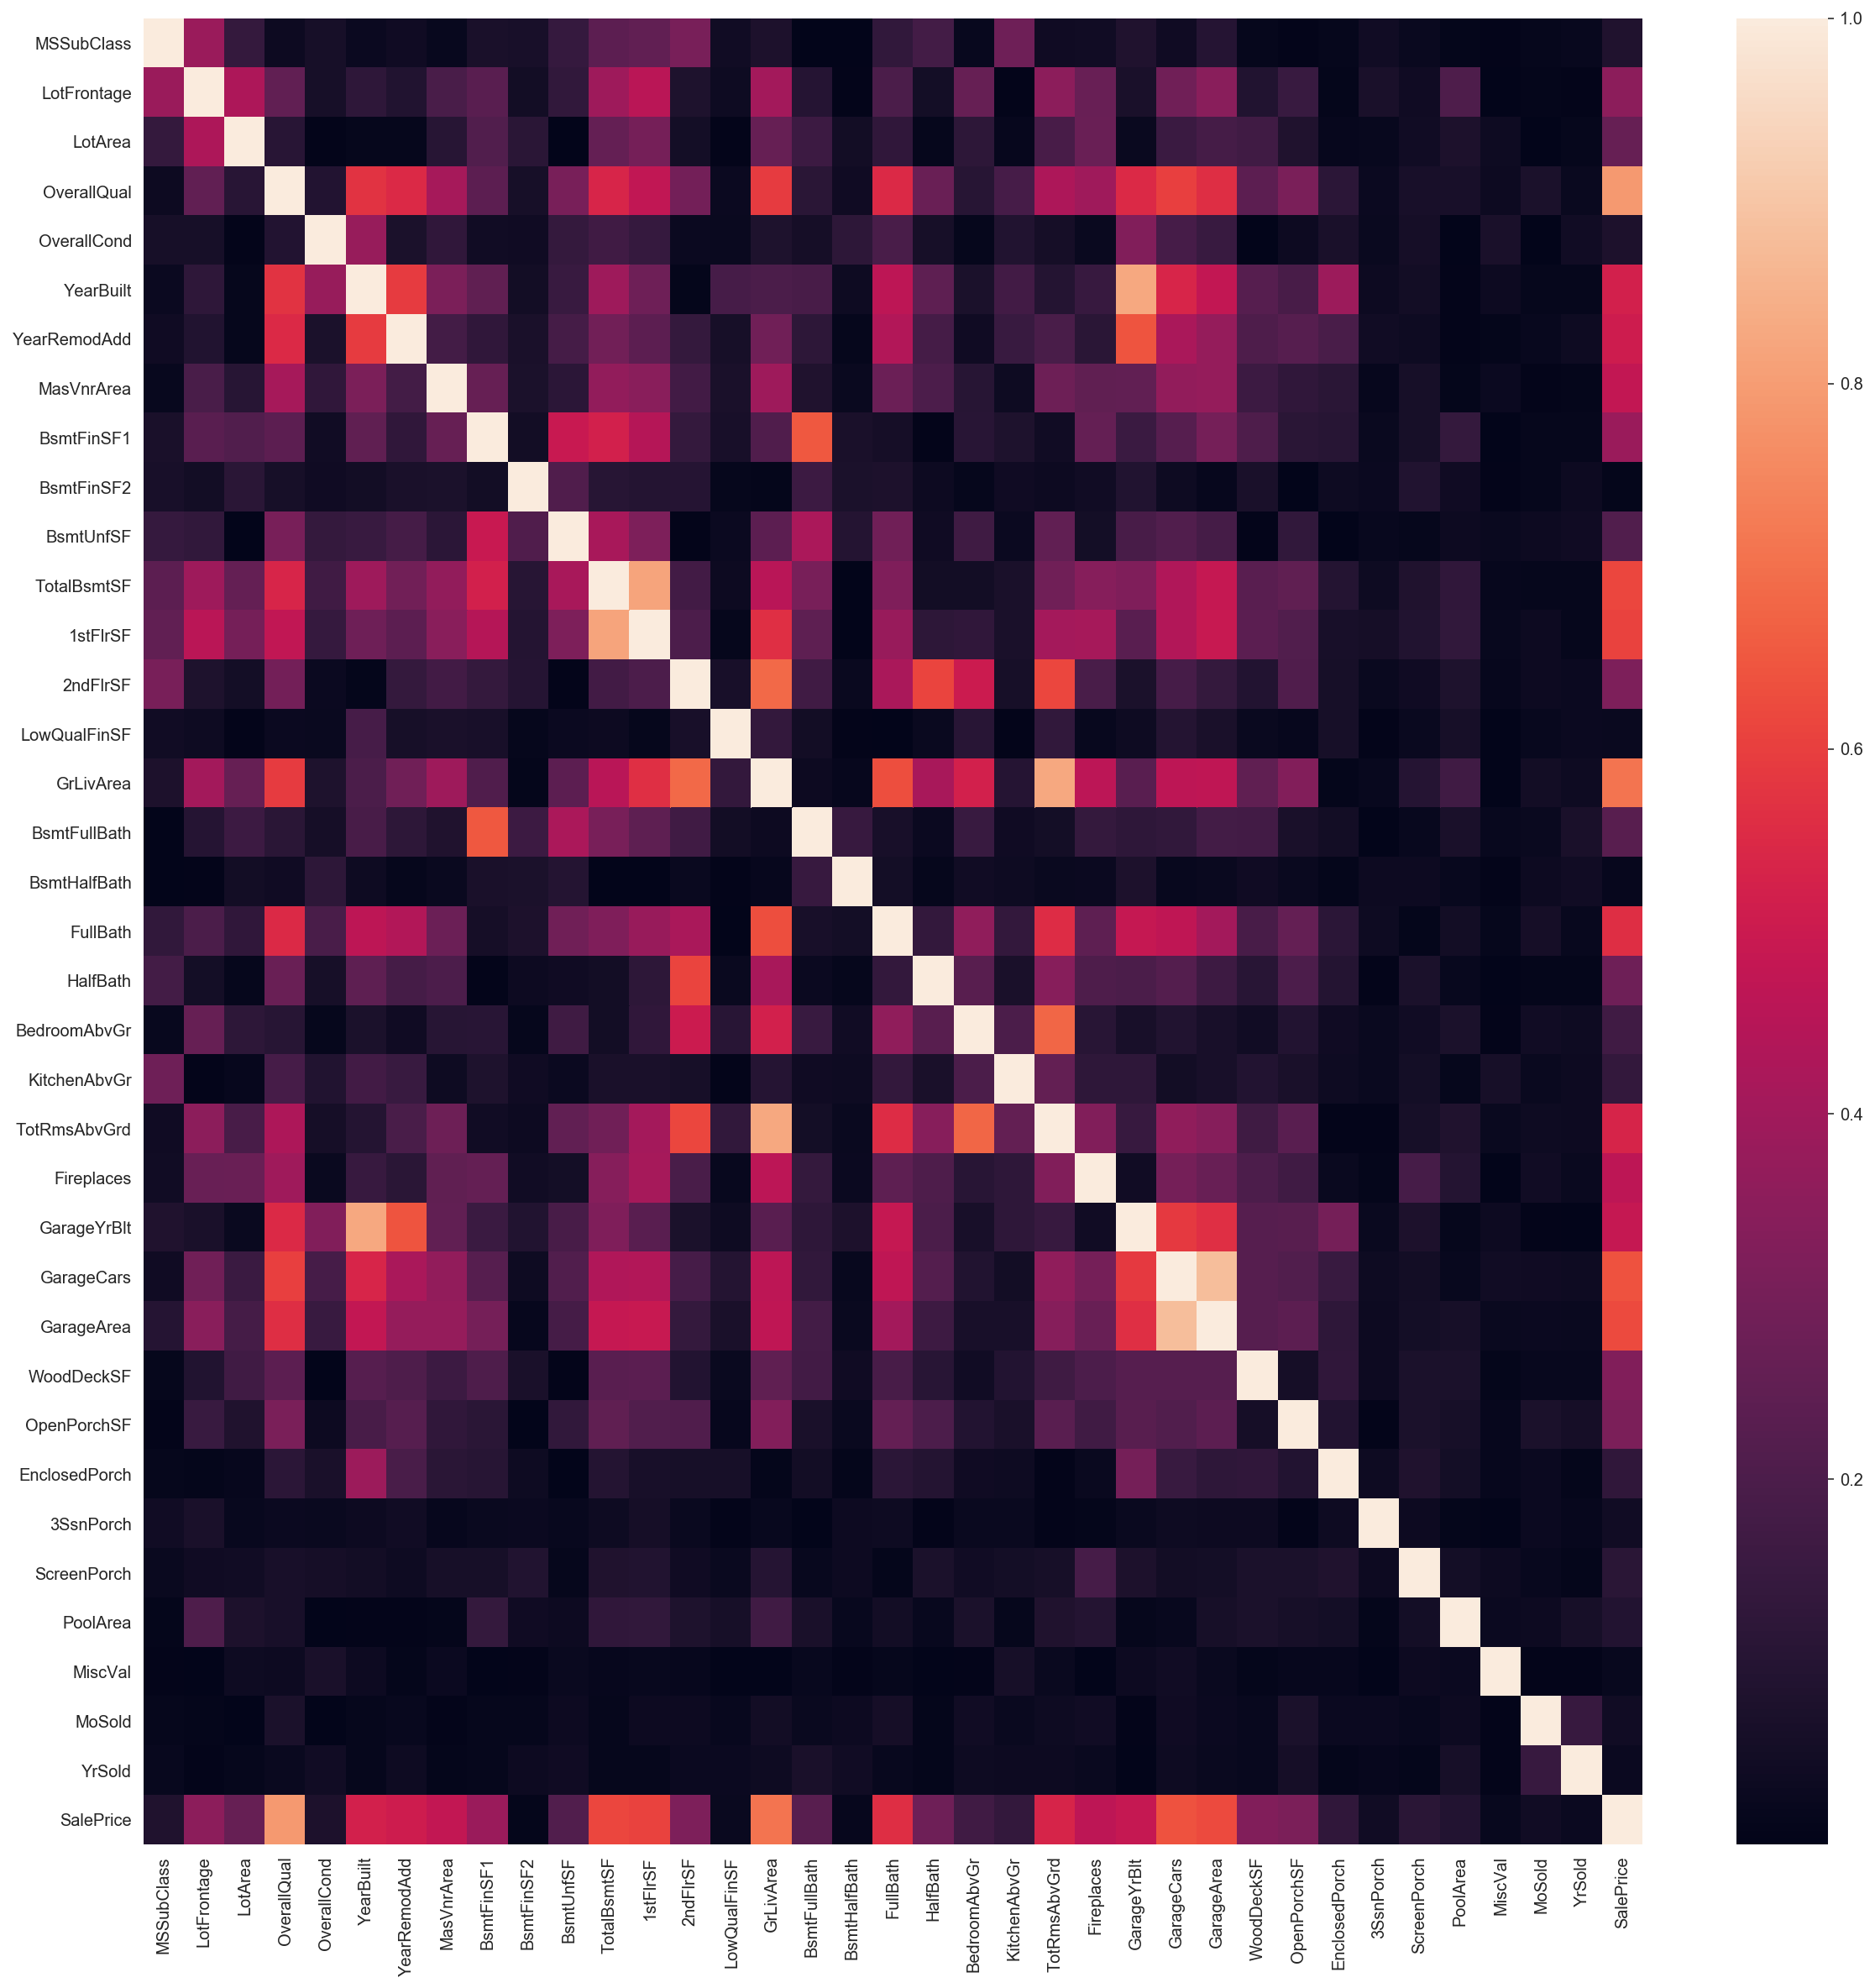

In [15]:
# Heatmap hidden from view. Open only if you want to see.
plt.figure(figsize=(20,20))
sns.heatmap(abs(house.corr()))

In [16]:
# Correlation Matrix for SalePrice vs other columns
pd.DataFrame(abs(house.corr()).unstack().sort_values(ascending=False).loc['SalePrice'],columns=["SalePrice"])

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


### EDA:
From the heatmap and correlation matrix, we can observe the following:
<br>1. `OverallQual`, `GrLivArea`, `GarageCars`, `GarageArea`, `TotalBsmtSF` have the top 5 highest correlation with `SalePrice`.
<br>2. `OverallQual` has the highest correlation to `SalePrice`, but we cannot use it as it is a combination of other features.
<br>3. Porches in general do not have much correlation to `SalePrice`.

In [17]:
# For identification of Quality / Condition variable columns:
quality = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
           'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

# For identification of aggregated columns that are combination of other columns:
unimportant = ['YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
               'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'LowQualFinSF',
               'GarageFinish', 'GarageCars']

# For identification of variables that can be feature engineered into dummy columns.
dummy = ['Street', 'Alley', 'Utilities', 'MasVnrType', 'BsmtExposure',
         'CentralAir', 'GarageArea', 'PoolArea', 'Fence', 'MiscFeature']

In [18]:
# replacing MSSubClass into their respective values
house = house.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"}})

In [19]:
# Making a copy of house for easier reference
house2 = house.copy()

In [20]:
dummy = ["LotShape", "LandSlope", "BldgType", "LotConfig", "Foundation", "MasVnrType", "PavedDrive"]

In [21]:
# Creating Dummy columns for dummy list and drop those quality and non-fixed columns.
for item in dummy:
    house = house.join(pd.get_dummies(house[item], prefix=item), on=house.index)
house.drop(columns=quality, inplace=True)
house.drop(columns=unimportant, inplace=True)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,SC60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,0,1
1,SC20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,1,0,0,0,1
2,SC60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,0,1
3,SC70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,0,0,0,1
4,SC60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,0,1


In [22]:
pd.DataFrame(abs(house.corr()).unstack().sort_values(ascending=False).loc['SalePrice'],columns=["SalePrice"])

,SalePrice
SalePrice,1.000000
GrLivArea,0.708624
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
Foundation_PConc,0.497734
GarageYrBlt,0.486362


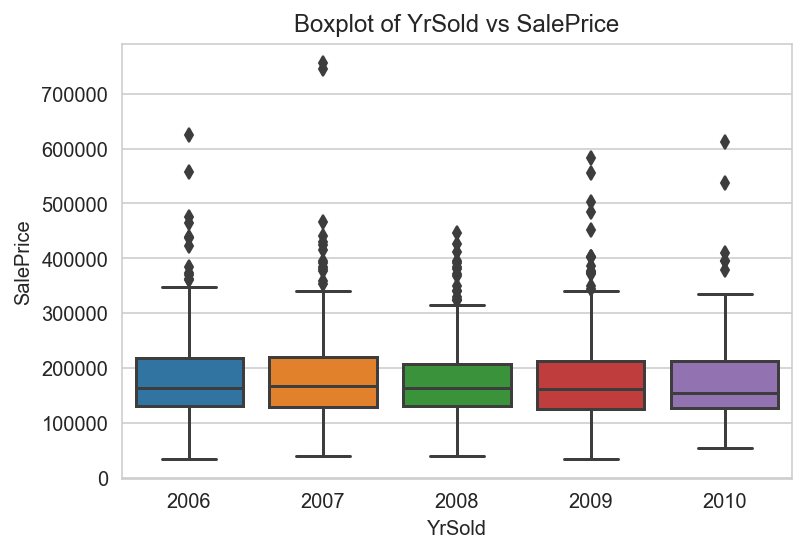

In [23]:
fig, ax = plt.subplots()
sns.boxplot(house["YrSold"], house["SalePrice"])
ax.set_title("Boxplot of YrSold vs SalePrice")
plt.show()
# Seems like there are outliers present.

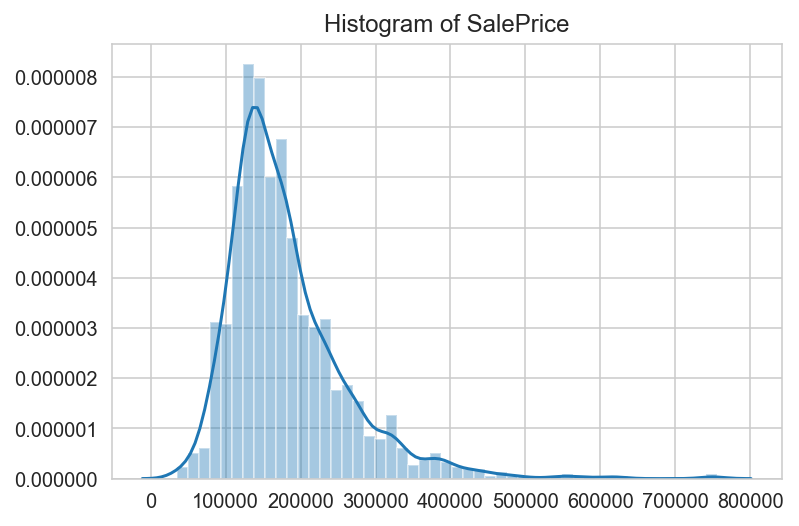

In [24]:
sns.distplot(house[["SalePrice"]])
plt.title("Histogram of SalePrice")
plt.show()

As the distribution of `SalePrice` is not normally distributed, I will apply log transformation to make it appear normal.
<br>This is due to machine learning models may behave poorly under non-normal distributions.

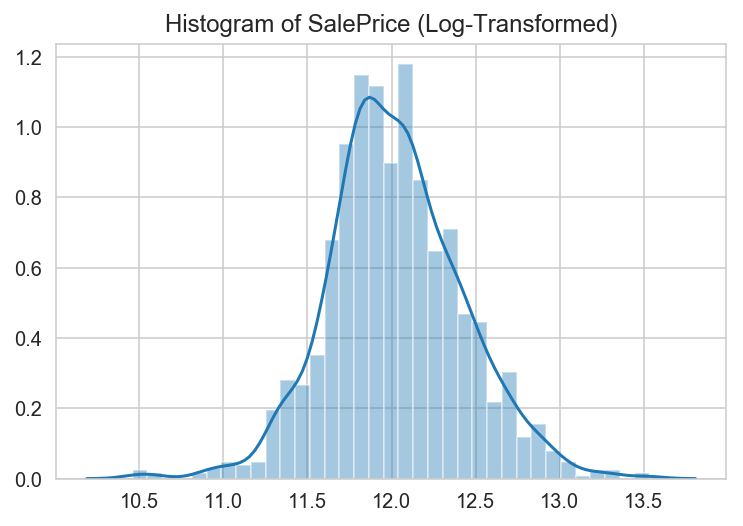

In [25]:
house["SalePrice_Log"] = np.log1p(house["SalePrice"])
sns.distplot(house[["SalePrice_Log"]])
plt.title("Histogram of SalePrice (Log-Transformed)")
plt.show()

---
### Step 2
Be sure to remove any houses that are not residential from the dataset.

In [26]:
'''
From description file:
# C  - Commercial
# FV - Floating Village Residential
# RH - Residential High Density
# RL - Residential Low Density
# RM- Residential Medium Density
'''

house["MSZoning"].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [27]:
# Drop rows of houses not in residential zone
housenotresidential = house[house["MSZoning"].isin(['C (all)'])]
print("Dropped", len(housenotresidential), "rows not related to residential.")
house = house.drop(index=housenotresidential.index)

Dropped 10 rows not related to residential.


In [28]:
# converting dummy variables
# Street 0 (Gravel), 1 (Pave)
house["has_Street"] = (house["Street"] == 'Grvl').astype(int)
# Alley 0 (No Alley), 1 (Pave/Gravel)
house["has_Alley"] = (~house["Alley"].isnull()).astype(int)
# Utilities 0 (AllPub), 1 (NoSeWa)
house["has_Utilities"] = (house["Utilities"] == 'NoSeWa').astype(int)
# MasVnr 0 (None), 1 (Present)  # checked NaN = None
house["has_MasVnr"] = ((~house["MasVnrType"].isnull()) & (house["MasVnrType"] != 'None')).astype(int)
house.loc[house[house["MasVnrType"].isnull()].index, "MasVnrArea"] = 0.0
# Bsmt 0 (None), 1 (Present)  # checked NaN = No
house["has_Bsmt"] = ((~house["BsmtExposure"].isnull()) & (house["BsmtExposure"] != 'No')).astype(int)
# CentralAir 0 (None), 1 (Present)
house["CentralAir"] = (house["CentralAir"] == 'Y').astype(int)
# Garage 0 (None), 1 (Present)  # Newly created
house["has_Garage"] = ((~house["GarageArea"].isnull()) & (house["GarageArea"] != 0)).astype(int)
# Pool 0 (None), 1 (Present)  # Newly created
house["has_Pool"] = ((~house["PoolArea"].isnull()) & (house["PoolArea"] != 0)).astype(int)
# Fence 0 (None), 1 (Present)
house["has_Fence"] = (~house["Fence"].isnull()).astype(int)
# MiscFeature becomes dummy variables
df = pd.get_dummies(house["MiscFeature"], prefix="Misc")
house = pd.concat([house, df], axis=1)

In [29]:
# A:
# Check if feature-engineered variables have correlation to SalePrice
pd.DataFrame(abs(house.corr()).unstack().sort_values(ascending=False).loc['SalePrice_Log'],columns=["SalePrice_Log"])

,SalePrice_Log
SalePrice_Log,1.000000
SalePrice,0.952050
GrLivArea,0.704826
GarageArea,0.663532
TotalBsmtSF,0.614450
1stFlrSF,0.596437
FullBath,0.591312
YearBuilt,0.582792
GarageYrBlt,0.543581
TotRmsAbvGrd,0.536119


Based on what we see above, here are some observations of the correlations of variables with`SalePrice_Log`:
<br>1. Naturally, I will exclude `SalePrice` as it is the original value.
<br>2. `GrLivArea`, `GarageArea`, `TotalBsmtSF`, `1stFlrSF`, `FullBath` are the top 5 from the list.

### Step 3:
Identify fixed features that can predict price.
<br>I will select the *fixed* features and then use several regression techniques to identify which is the best model.

,GrLivArea,GarageArea,TotalBsmtSF
GrLivArea,1.000000,0.474343,0.452676
GarageArea,0.474343,1.000000,0.490651
TotalBsmtSF,0.452676,0.490651,1.000000


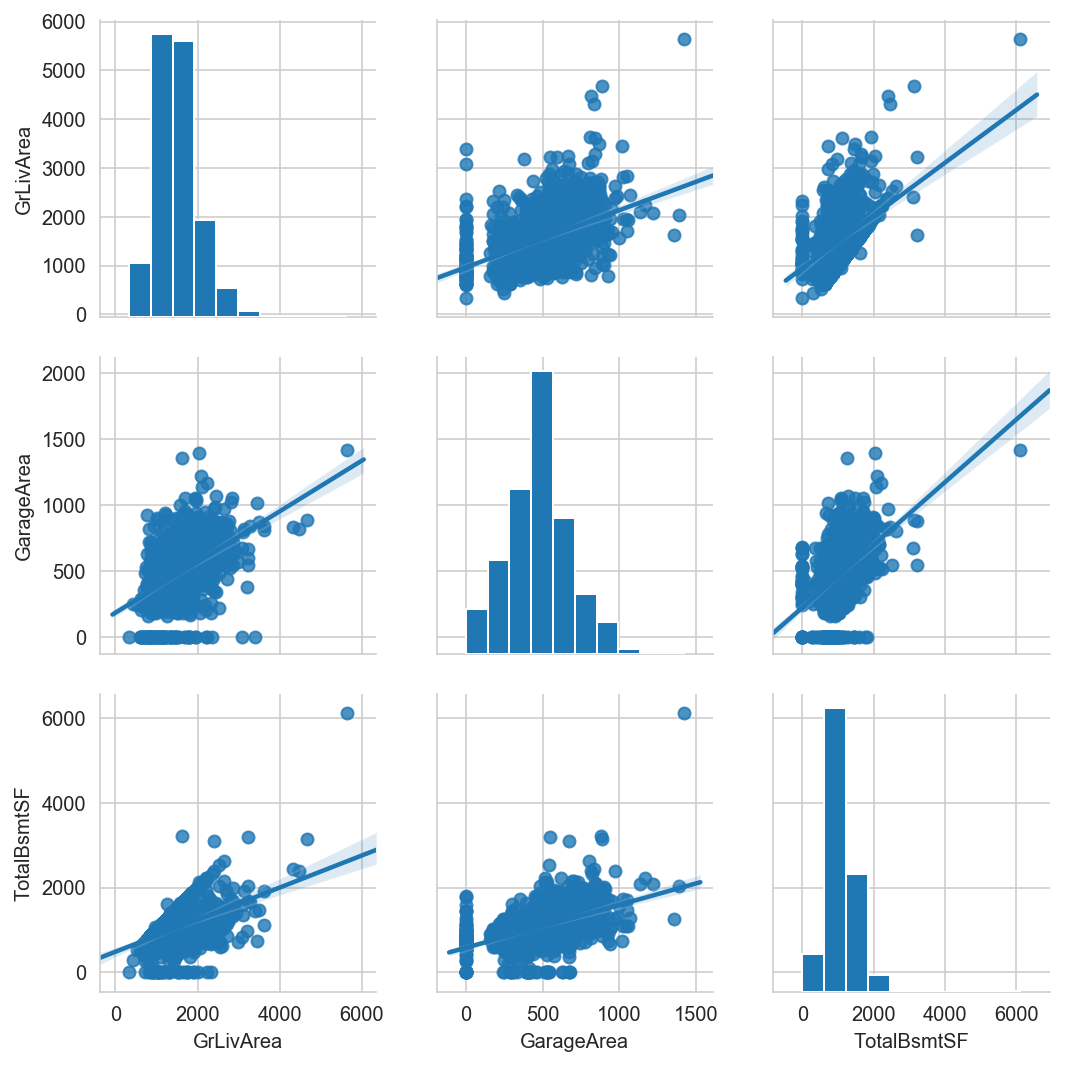

In [30]:
test_relationship = ["GrLivArea", "GarageArea", "TotalBsmtSF"]
sns.pairplot(house[test_relationship], kind='reg')
house[test_relationship].corr()
# Conclusion: GrLivArea has some correlation figure with GarageArea and TotalBsmtSF.
# I cannot conlude if it is significant to be collinear.

,GrLivArea,1stFlrSF,2ndFlrSF
GrLivArea,1.000000,0.564098,0.687450
1stFlrSF,0.564098,1.000000,-0.205486
2ndFlrSF,0.687450,-0.205486,1.000000


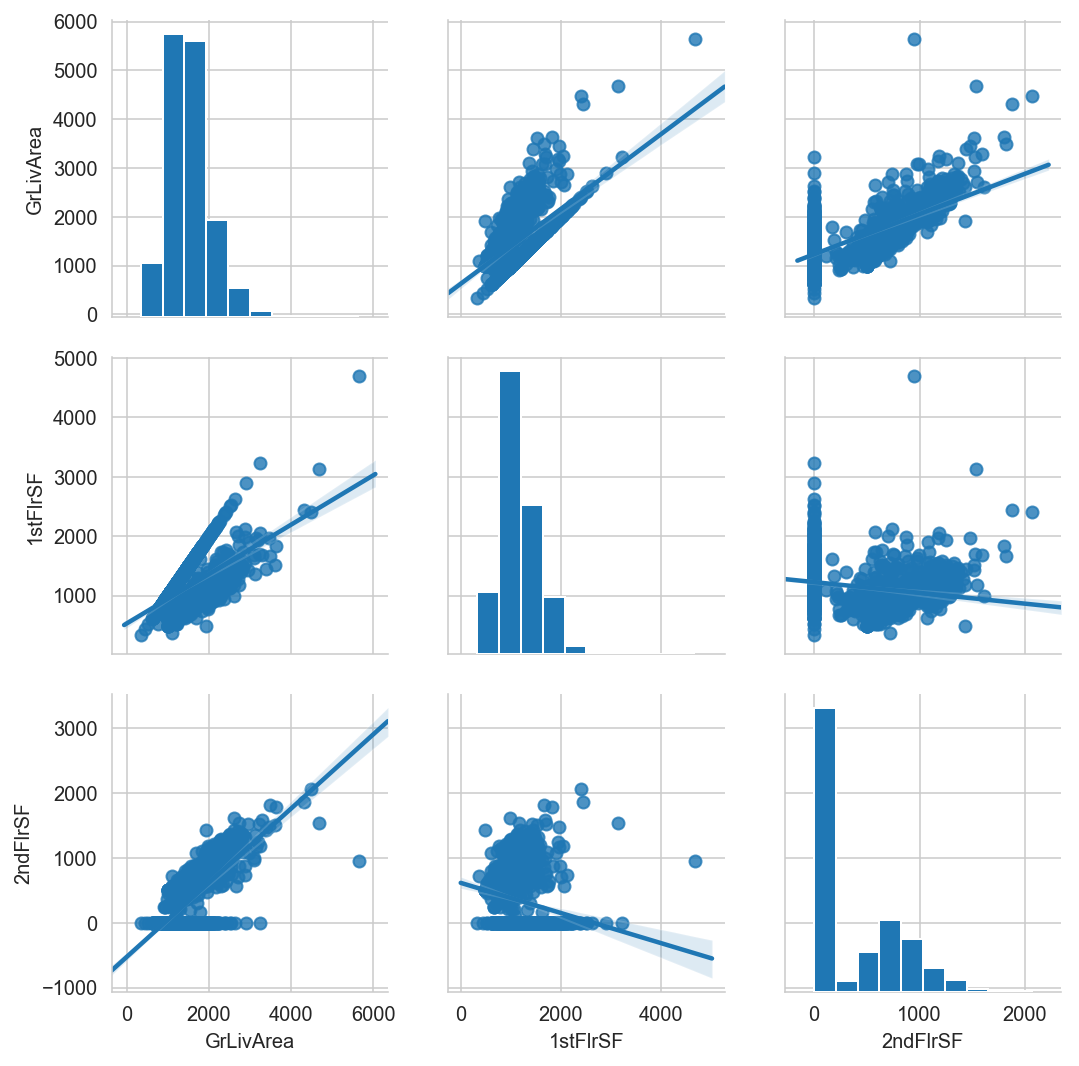

In [31]:
test_relationship = ["GrLivArea", "1stFlrSF", "2ndFlrSF"]
sns.pairplot(house[test_relationship], kind='reg')
house[test_relationship].corr()
# Conclusion: GrLivArea has quite a high correlation figure with 1stFlrSF and 2ndFlrSF.
# That is because it comprises of GrLivArea = 1stFlrSF + 2ndFlrSF + unknown components.
# As such, I will remove GrLivArea from fixed features selection.

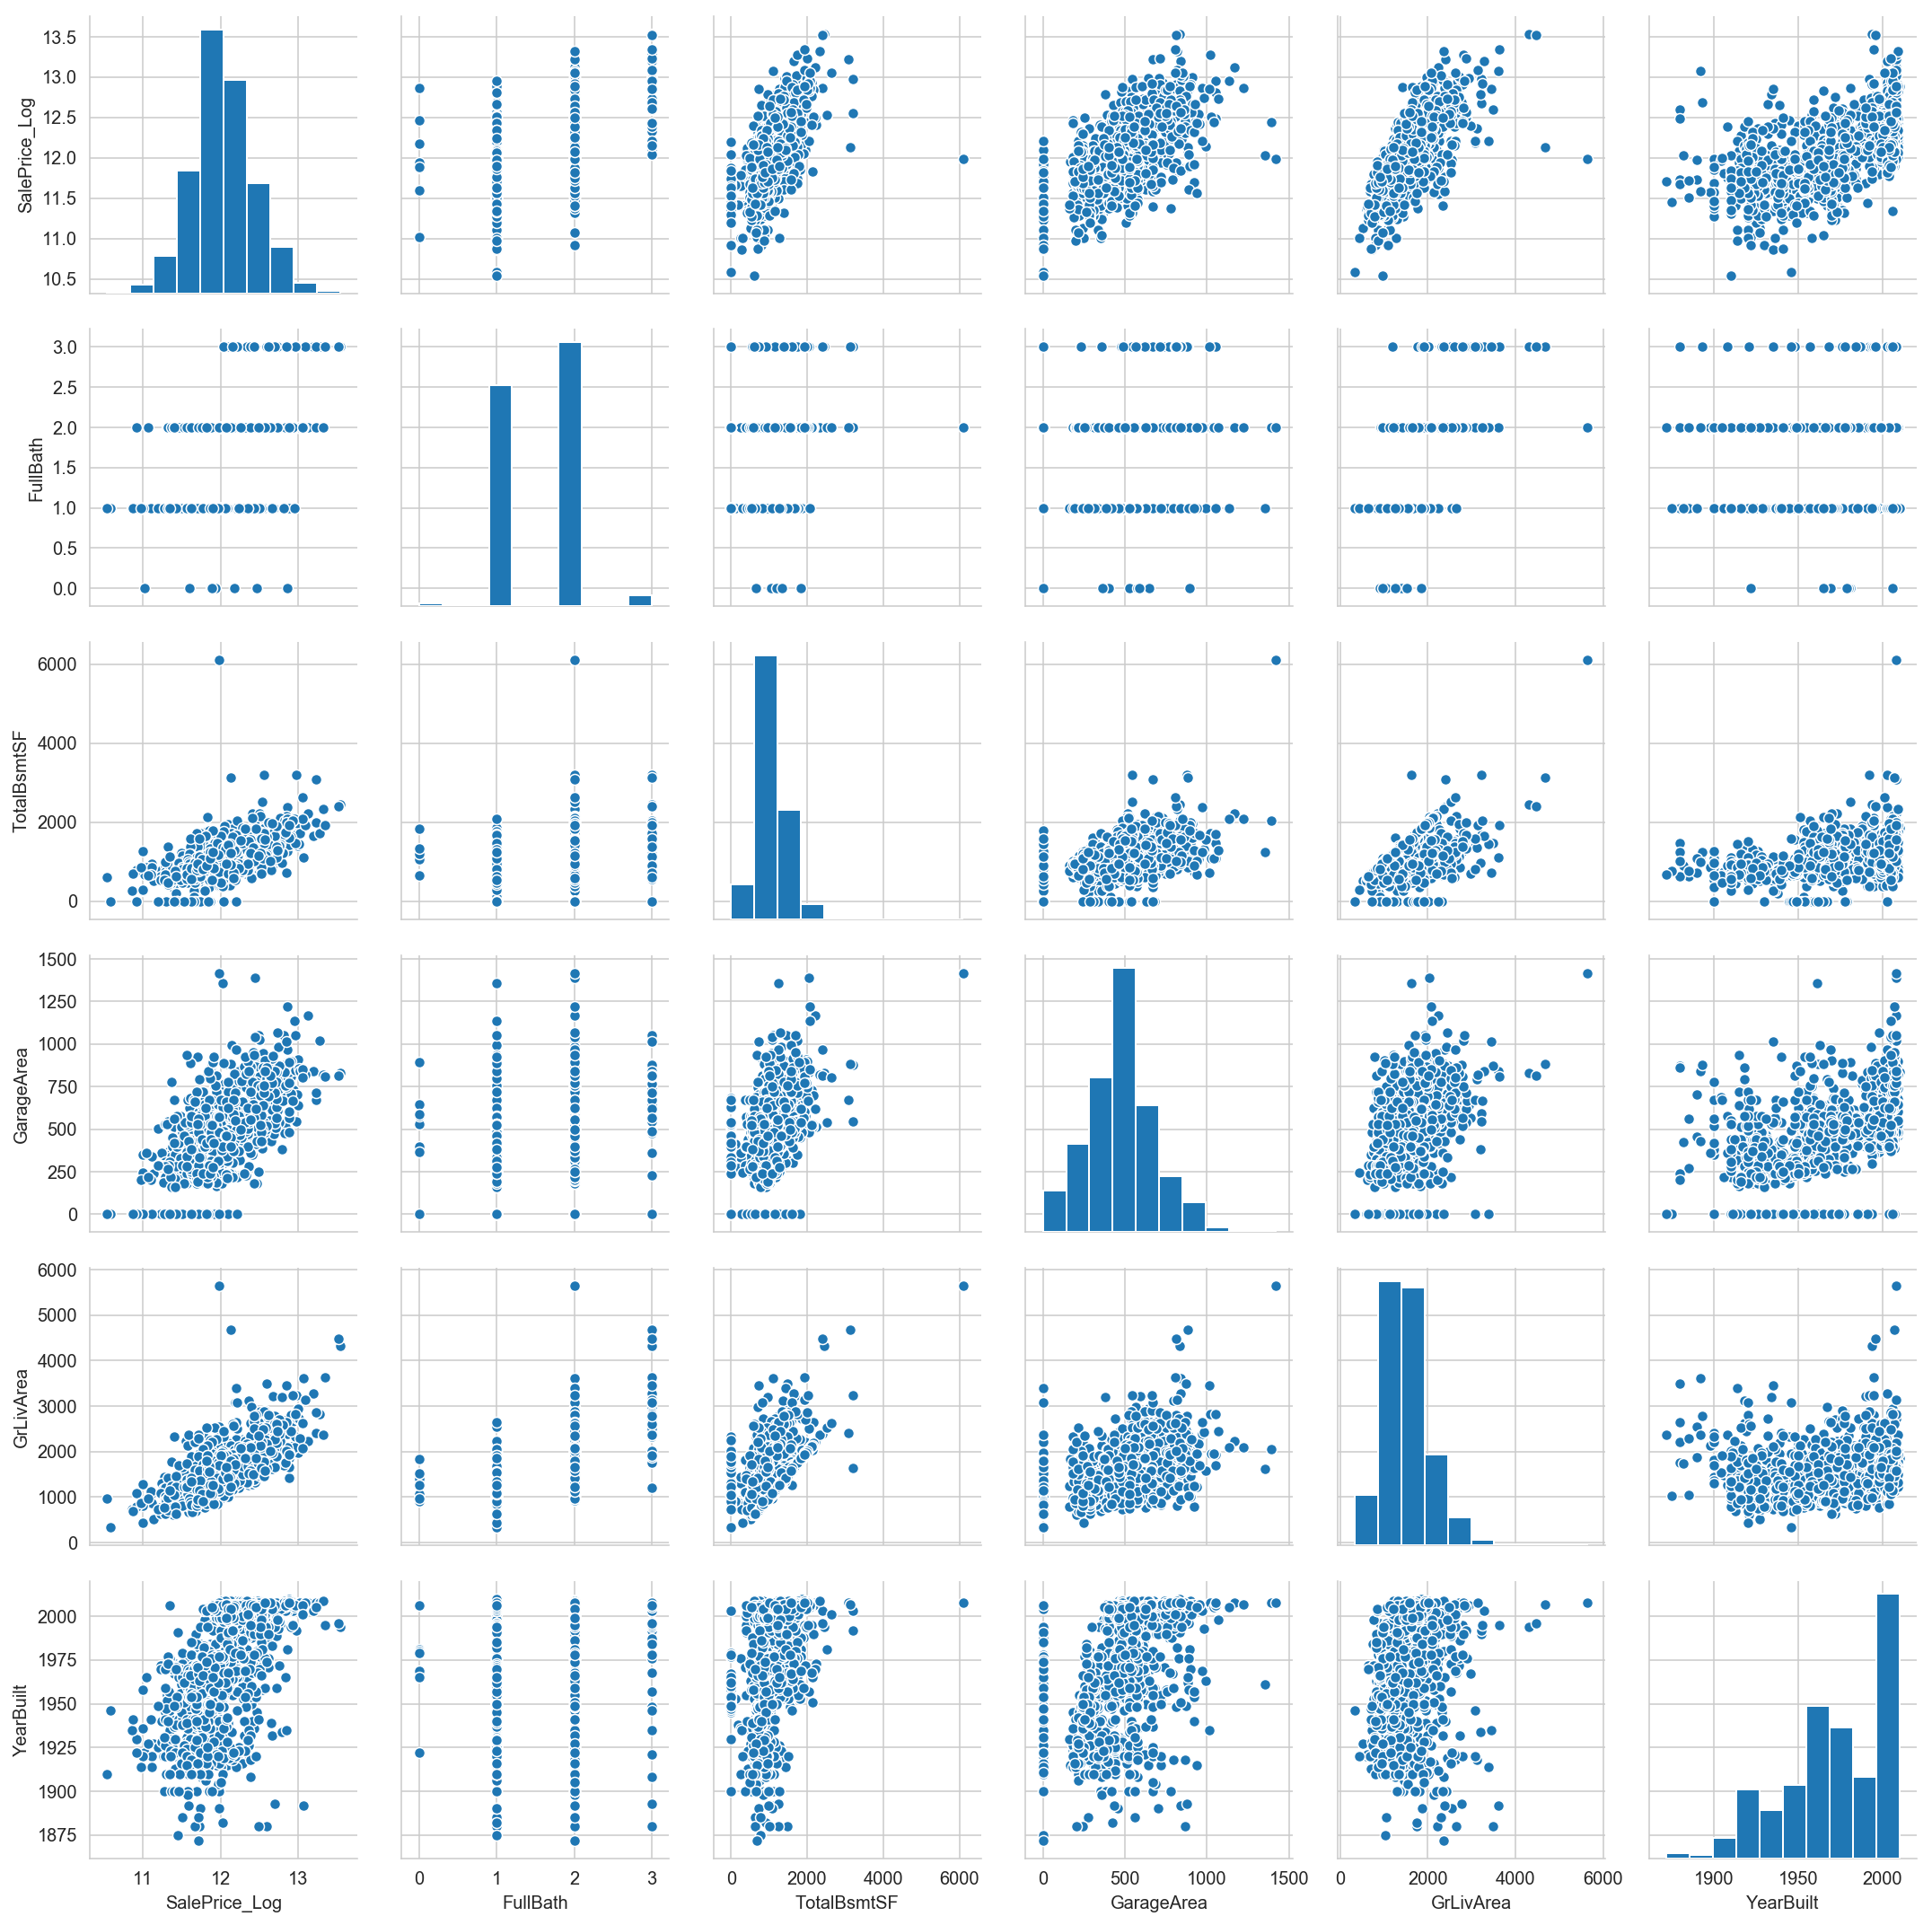

In [32]:
# Showing the pairplot of the Top 5 Correlated variables VS SalePrice_Log
sns.pairplot(house[["SalePrice_Log", "FullBath", "TotalBsmtSF", "GarageArea","GrLivArea","YearBuilt"]])
plt.show()

------
### Step 4:
Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
<br>As seen above, I will split the dataset into `bef2010` and `act2010` data.

In [33]:
# Split into train and test set before random selection.
bef2010 = house[house["YrSold"] != 2010]  # 1278 rows
act2010 = house[house["YrSold"] == 2010]   #  172 rows

In [34]:
# For fixed features, I will choose variables that have a minimum of 0.30 correlation with SalePrice_Log for initial test.
y = ["SalePrice_Log"]
fixed_features = ["GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt",
                  "GarageYrBlt", "MasVnrArea", "Fireplaces", "LotFrontage", "OpenPorchSF", "WoodDeckSF",
                  "2ndFlrSF", "LotArea"]

In [35]:
# Imports
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
import statsmodels.api as sm

In [36]:
# As seen, we have the null values from LotFrontage.
# Due to this being possibly an important variable for training the model
bef2010[fixed_features].isnull().sum()

GarageArea        0
TotalBsmtSF       0
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
GarageYrBlt      68
MasVnrArea        0
Fireplaces        0
LotFrontage     227
OpenPorchSF       0
WoodDeckSF        0
2ndFlrSF          0
LotArea           0
dtype: int64

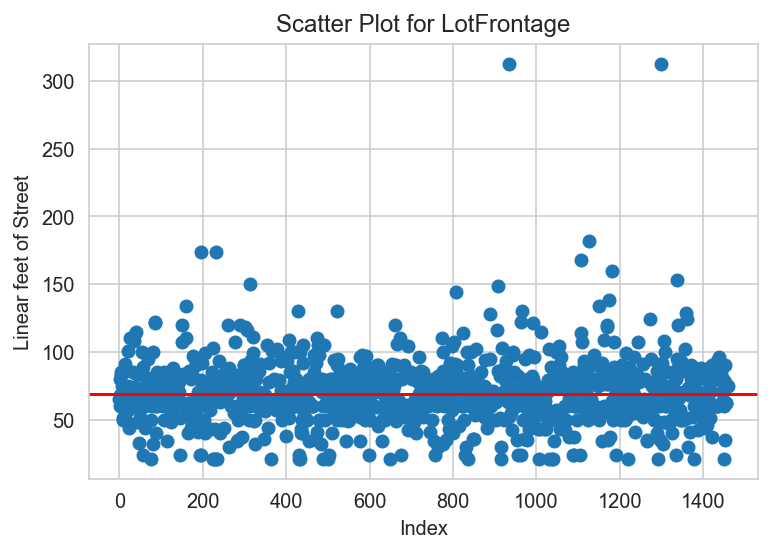

In [37]:
plt.scatter(bef2010["LotFrontage"].index, bef2010["LotFrontage"])
plt.axhline(bef2010["LotFrontage"].median(), color='r')
plt.title("Scatter Plot for LotFrontage")
plt.xlabel("Index")
plt.ylabel("Linear feet of Street")
plt.show()

As seen from the scatter plot, there are a few outliers but I can use median to fill the Null values.

In [38]:
bef2010["LotFrontage"].fillna(bef2010["LotFrontage"].median(), inplace=True)
bef2010["GarageYrBlt"].fillna(0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [39]:
ss = StandardScaler()
X_train = ss.fit_transform(bef2010[fixed_features])
y_train = bef2010[y]

In [40]:
act2010["LotFrontage"].fillna(act2010["LotFrontage"].median(), inplace=True)
act2010["GarageYrBlt"].fillna(0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [41]:
X_test = ss.transform(act2010[fixed_features])
y_test = act2010[y]

In [42]:
baseline = np.mean(y_test)
baseline

SalePrice_Log    12.015014
dtype: float64

In [43]:
bef2010[fixed_features].shape

(1278, 14)

### Using Simple Linear Regression

In [44]:
model = LinearRegression()
lm = model.fit(X_train, y_train)
y_pred = lm.predict(X_test)
lm_resid = y_test - y_pred
print("Model Score on Train Set:", model.score(X_train, y_train))
print("Model Score on Test Set:", model.score(X_test, y_test))

Model Score on Train Set: 0.7775436981723065
Model Score on Test Set: 0.8205670977026501


In [45]:
scores = cross_val_score(lm, X_train, y_train, cv=5)
print(scores)
print("Mean:", np.mean(scores), "Std:", np.std(scores))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

[0.81693217 0.78359895 0.81234821 0.76159825 0.57190656]
Mean: 0.7492768273947339 Std: 0.09093435274686536
RMSE: 0.166761534475223


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


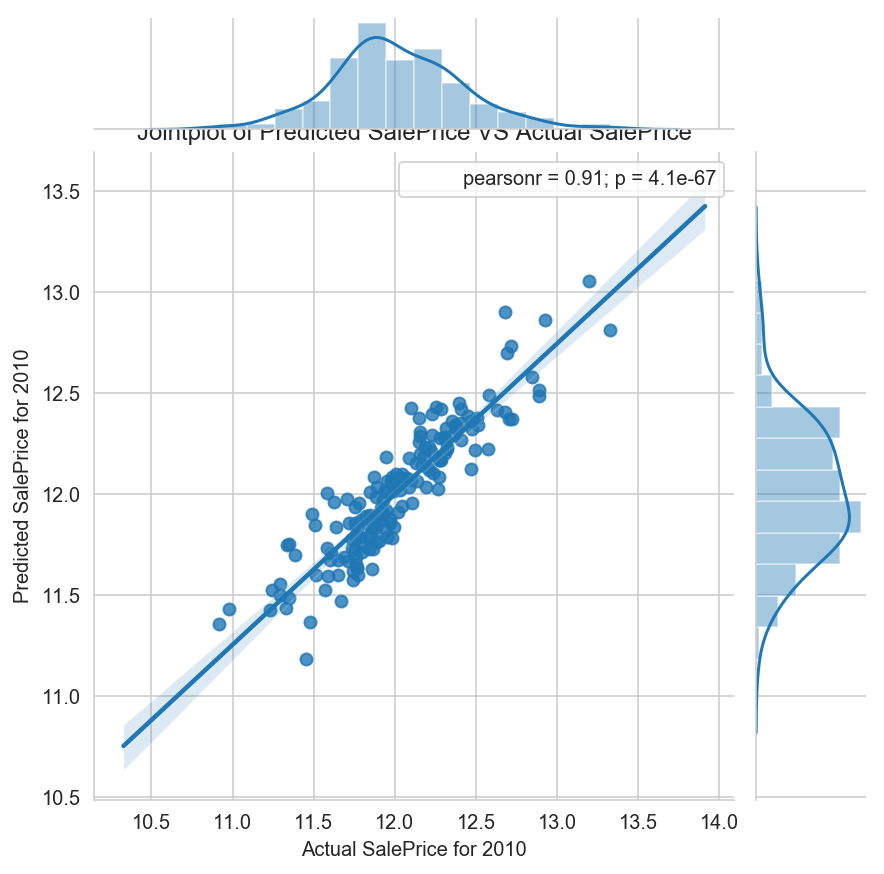

In [46]:
sns.jointplot(x=act2010[y], y=lm.predict(X_test), kind="reg").annotate(stats.pearsonr)
plt.title("Jointplot of Predicted SalePrice VS Actual SalePrice")
plt.xlabel("Actual SalePrice for 2010")
plt.ylabel("Predicted SalePrice for 2010")
plt.show()

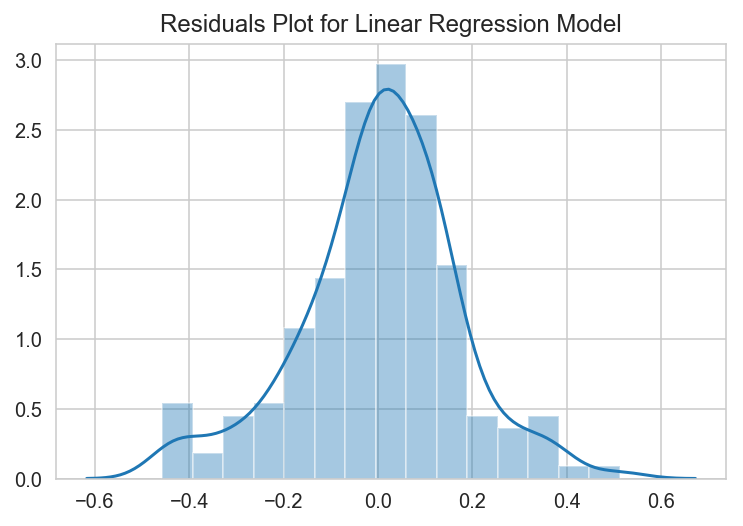

In [47]:
sns.distplot(lm_resid)
plt.title("Residuals Plot for Linear Regression Model")
plt.show()

In [48]:
print(lm.coef_)
print(lm.intercept_)

[[ 0.06146435  0.06398682  0.08480474  0.02022394  0.01405262  0.1139609
   0.01837423  0.00405271  0.05625419 -0.0010097   0.01495903  0.02400551
   0.11198167  0.01328875]]
[12.03236206]


In [49]:
X_train2 = np.concatenate([X_train, np.ones((X_train.shape[0],1))], axis=1)
model = sm.OLS(y_train, X_train2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_Log   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     315.3
Date:                Fri, 12 Oct 2018   Prob (F-statistic):               0.00
Time:                        07:03:45   Log-Likelihood:                 346.04
No. Observations:                1278   AIC:                            -662.1
Df Residuals:                    1263   BIC:                            -584.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0615      0.008      7.520      0.000       0.045       0.077
x2             0.0640      0.010      6.548      0.000       0.045       0.083
x3             0.0848      0.013      6.773      0.000       0.060       0.109
x4             0.0202      0.008      2.627      0.009       0.005       0.035
x5             0.0141      0.009      1.501      0.134      -0.004       0.032
x6             0.1140      0.007     16.122      0.000       0.100       0.128
x7             0.0184      0.006      2.869      0.004       0.006       0.031
x8             0.0041      0.006      0.676      0.499      -0.008       0.016
x9             0.0563      0.006      9.125      0.000       0.044       0.068
x10           -0.0010      0.006     -0.166      0.868      -0.013       0.011
x11            0.0150      0.006      2.629      0.009       0.004       0.026
x12            0.0240      0.006      4.311      0.000       0.013       0.035
x13            0.1120      0.010     11.303      0.000       0.093       0.131
x14            0.0133      0.006      2.327      0.020       0.002       0.024
const         12.0324      0.005   2316.764      0.000      12.022      12.043
==============================================================================
Omnibus:                      914.089   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54693.049
Skew:                          -2.677   Prob(JB):                         0.00
Kurtosis:                      34.598   Cond. No.                         6.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Using GridSearch on Linear Regression

In [50]:
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
gridsearch_linear = GridSearchCV(LinearRegression(), parameters, cv=3, verbose=1)
gridsearch_linear.fit(X_train, y_train)
print(gridsearch_linear.best_score_)
print(gridsearch_linear.best_estimator_.get_params())

Fitting 3 folds for each of 8 candidates, totalling 24 fits
0.7495965211674939
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True}


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.0s finished


In [51]:
y_pred_linear = gridsearch_linear.best_estimator_.predict(X_test)
mse_linear = mean_squared_error(act2010[y], y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

In [52]:
scores = cross_val_score(lm, X_train, y_train, cv=5)
print(scores)
print("Mean:", np.mean(scores), "Std:", np.std(scores))
print("RMSE:", rmse_linear)

[0.81693217 0.78359895 0.81234821 0.76159825 0.57190656]
Mean: 0.7492768273947339 Std: 0.09093435274686536
RMSE: 0.16676153447522293


In [53]:
# Checking the coefficients of the Linear Regression
coefs_vars = pd.DataFrame({
        'variable':bef2010[fixed_features].columns,
        'coef':gridsearch_linear.best_estimator_.coef_[0],
        'abscoef':np.abs(gridsearch_linear.best_estimator_.coef_[0])})
coefs_vars.sort_values('abscoef', ascending=False, inplace=True)
coefs_vars.T

,5,12,2,1,0,8,11,3,6,10,4,13,7,9
variable,YearBuilt,2ndFlrSF,1stFlrSF,TotalBsmtSF,GarageArea,Fireplaces,WoodDeckSF,FullBath,GarageYrBlt,OpenPorchSF,TotRmsAbvGrd,LotArea,MasVnrArea,LotFrontage
coef,0.113961,0.111982,0.0848047,0.0639868,0.0614643,0.0562542,0.0240055,0.0202239,0.0183742,0.014959,0.0140526,0.0132887,0.00405271,-0.0010097
abscoef,0.113961,0.111982,0.0848047,0.0639868,0.0614643,0.0562542,0.0240055,0.0202239,0.0183742,0.014959,0.0140526,0.0132887,0.00405271,0.0010097


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


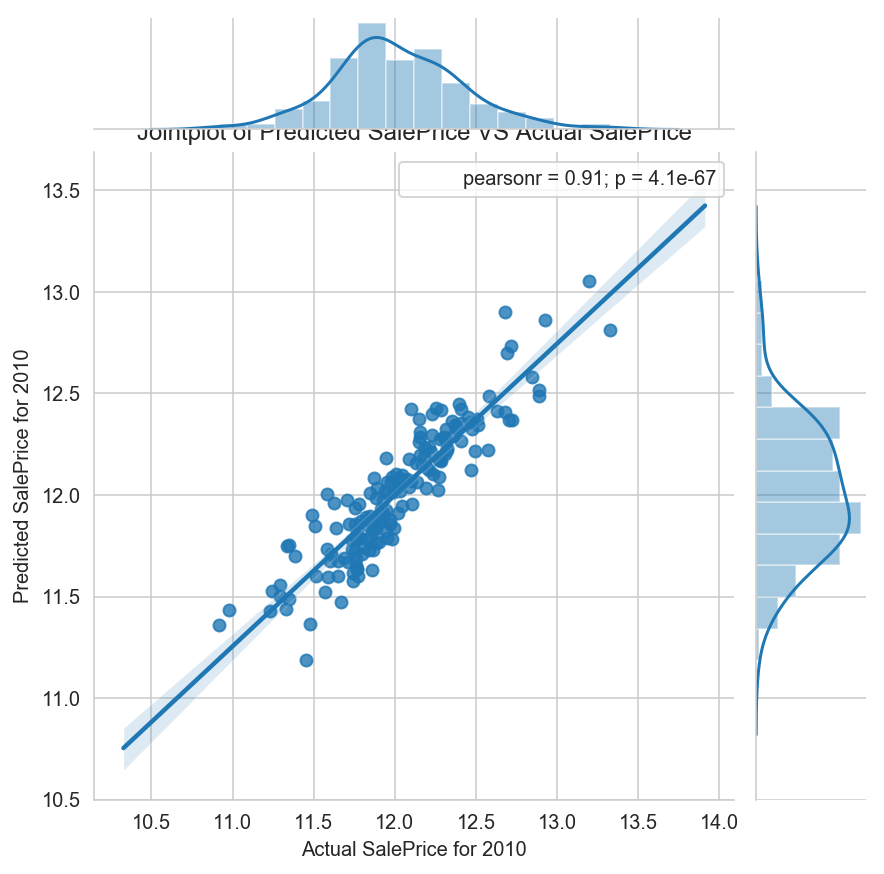

In [54]:
sns.jointplot(x=act2010[y], y=y_pred_linear, kind="reg").annotate(stats.pearsonr)
plt.title("Jointplot of Predicted SalePrice VS Actual SalePrice")
plt.xlabel("Actual SalePrice for 2010")
plt.ylabel("Predicted SalePrice for 2010")
plt.show()

------
### Using GridSearch on Ridge Regression

In [55]:
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
gridsearch_ridge = GridSearchCV(ridge, parameters, cv=3, verbose=1)
gridsearch_ridge.fit(X_train, y_train)
print(gridsearch_ridge.best_score_)
print(gridsearch_ridge.best_estimator_.get_params())

Fitting 3 folds for each of 48 candidates, totalling 144 fits
0.753219608888161
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': True, 'random_state': None, 'solver': 'auto', 'tol': 1e-06}


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    0.4s finished


In [56]:
y_pred_ridge = gridsearch_ridge.best_estimator_.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

In [57]:
rmse_ridge

0.17052104458562883

In [58]:
scores = cross_val_score(ridge, X_train, y_train, cv=5)
print(scores)
print("Mean:", np.mean(scores), "Std:", np.std(scores))
print("RMSE:", rmse_ridge)

[0.81688702 0.78364616 0.8123274  0.76159733 0.572487  ]
Mean: 0.7493889838133846 Std: 0.09070186298244971
RMSE: 0.17052104458562883


In [59]:
# Checking the coefficients of the Lasso Regression
coefs_vars = pd.DataFrame({
        'variable':bef2010[fixed_features].columns,
        'coef':gridsearch_ridge.best_estimator_.coef_[0],
        'abscoef':np.abs(gridsearch_ridge.best_estimator_.coef_[0])})
coefs_vars.sort_values('abscoef', ascending=False, inplace=True)
coefs_vars.T

,5,12,1,0,2,8,3,4,11,6,10,13,7,9
variable,YearBuilt,2ndFlrSF,TotalBsmtSF,GarageArea,1stFlrSF,Fireplaces,FullBath,TotRmsAbvGrd,WoodDeckSF,GarageYrBlt,OpenPorchSF,LotArea,MasVnrArea,LotFrontage
coef,0.098768,0.0803925,0.0640656,0.0617325,0.0584153,0.0567584,0.0331549,0.0297958,0.0260992,0.0211803,0.0192861,0.0135449,0.0117266,0.00371496
abscoef,0.098768,0.0803925,0.0640656,0.0617325,0.0584153,0.0567584,0.0331549,0.0297958,0.0260992,0.0211803,0.0192861,0.0135449,0.0117266,0.00371496


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


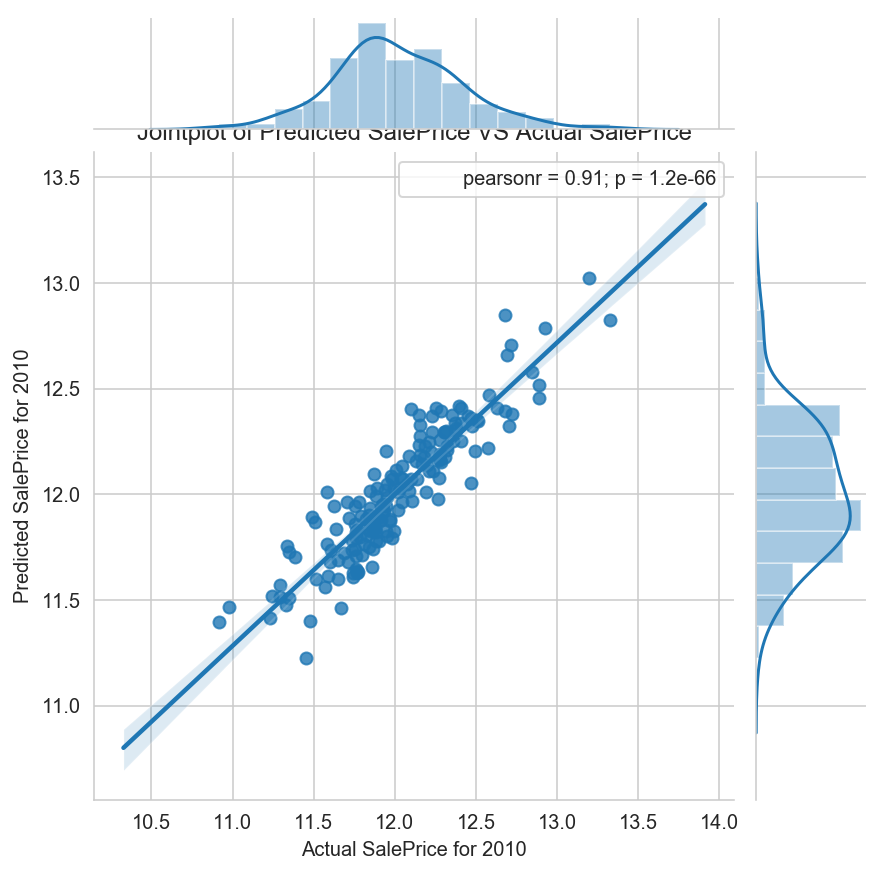

In [60]:
sns.jointplot(x=act2010[y], y=y_pred_ridge, kind="reg").annotate(stats.pearsonr)
plt.title("Jointplot of Predicted SalePrice VS Actual SalePrice")
plt.xlabel("Actual SalePrice for 2010")
plt.ylabel("Predicted SalePrice for 2010")
plt.show()

------
### Using GridSearch on Lasso Regression

In [61]:
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
gridsearch_lasso = GridSearchCV(lasso, parameters, cv=3, verbose=1)
gridsearch_lasso.fit(X_train, y_train)
print(gridsearch_lasso.best_score_)
print(gridsearch_lasso.best_estimator_.get_params())

Fitting 3 folds for each of 72 candidates, totalling 216 fits
0.7533879653058836
{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 1e-06, 'warm_start': False}


[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    0.7s finished


In [62]:
y_pred_lassot = gridsearch_lasso.best_estimator_.predict(X_train).reshape(-1,1)
y_pred_lasso = gridsearch_lasso.best_estimator_.predict(X_test).reshape(-1,1)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

In [63]:
# For Q2
y_pred_lasso1 = y_pred_lasso
resid1 = (np.exp(y_test) - np.exp(y_pred_lasso1)).sum()

In [64]:
scores_lasso = cross_val_score(lasso, bef2010[fixed_features], y_train, cv=5)
print(scores_lasso)
print("Mean:", np.mean(scores_lasso), "Std:", np.std(scores_lasso))
print("RMSE:", rmse_lasso)

[0.81822422 0.7626799  0.78765563 0.75174118 0.52918675]
Mean: 0.7298975353121678 Std: 0.10293128803522948
RMSE: 0.170165703470038


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


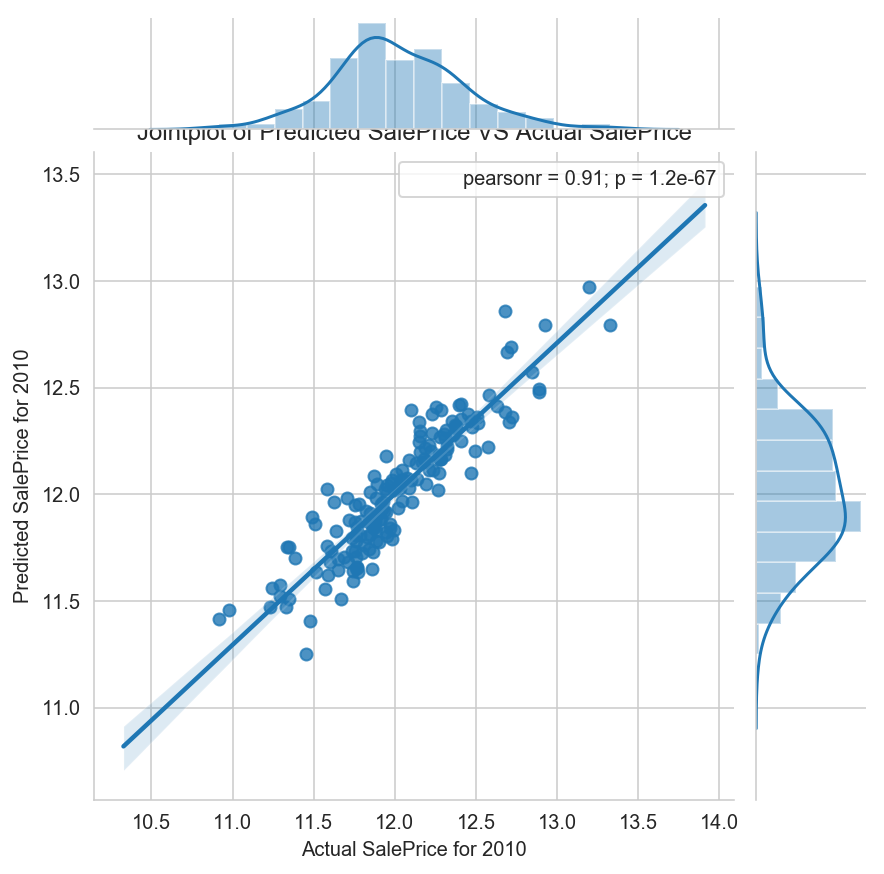

In [65]:
sns.jointplot(x=y_test, y=y_pred_lasso, kind="reg").annotate(stats.pearsonr)
plt.title("Jointplot of Predicted SalePrice VS Actual SalePrice")
plt.xlabel("Actual SalePrice for 2010")
plt.ylabel("Predicted SalePrice for 2010")
plt.show()

In [66]:
# Checking the coefficients of the Lasso Regression
coefs_vars = pd.DataFrame({
        'variable':bef2010[fixed_features].columns,
        'coef':gridsearch_lasso.best_estimator_.coef_,
        'abscoef':np.abs(gridsearch_lasso.best_estimator_.coef_)
    })
coefs_vars.sort_values('abscoef', ascending=False, inplace=True)
coefs_vars.T

,5,12,2,0,1,8,3,11,4,10,6,13,7,9
variable,YearBuilt,2ndFlrSF,1stFlrSF,GarageArea,TotalBsmtSF,Fireplaces,FullBath,WoodDeckSF,TotRmsAbvGrd,OpenPorchSF,GarageYrBlt,LotArea,MasVnrArea,LotFrontage
coef,0.106943,0.0971681,0.073155,0.0690883,0.063975,0.0563445,0.0232625,0.019442,0.0188745,0.0100132,0.00975274,0.00680158,0.00070233,0
abscoef,0.106943,0.0971681,0.073155,0.0690883,0.063975,0.0563445,0.0232625,0.019442,0.0188745,0.0100132,0.00975274,0.00680158,0.00070233,0


------
### Using GridSearch on Elastic Net Regression

In [67]:
from sklearn.linear_model import ElasticNetCV

elasticnet = ElasticNetCV()
parameters = {'l1_ratio':[1e-03,0.01,0.1,0.2,0.5,0.8,1],
              'normalize':[True,False],
              'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
gridsearch_elasticnet = GridSearchCV(elasticnet, parameters, cv=3, verbose=1)
gridsearch_elasticnet.fit(X_train, y_train.values.ravel())
print(gridsearch_elasticnet.best_score_)
print(gridsearch_elasticnet.best_estimator_.get_params())

Fitting 3 folds for each of 84 candidates, totalling 252 fits
0.7509558836232162
{'alphas': None, 'copy_X': True, 'cv': None, 'eps': 0.001, 'fit_intercept': True, 'l1_ratio': 0.001, 'max_iter': 1000, 'n_alphas': 100, 'n_jobs': 1, 'normalize': False, 'positive': False, 'precompute': 'auto', 'random_state': None, 'selection': 'cyclic', 'tol': 0.001, 'verbose': 0}


[Parallel(n_jobs=1)]: Done 252 out of 252 | elapsed:   13.5s finished


In [68]:
y_pred_elasticnet = gridsearch_elasticnet.best_estimator_.predict(X_test).reshape(-1,1)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
rmse_elasticnet = np.sqrt(mse_elasticnet)

In [69]:
scores = cross_val_score(elasticnet, X_train, y_train.values.ravel(), cv=5)
print(scores)
print("Mean:", np.mean(scores), "Std:", np.std(scores))
print("RMSE:", rmse_elasticnet)

[0.81206805 0.77679914 0.80168556 0.7684684  0.57947124]
Mean: 0.7476984805725273 Std: 0.08559986993498989
RMSE: 0.1762760145068147


In [70]:
coefs_vars = pd.DataFrame({
        'coef':gridsearch_elasticnet.best_estimator_.coef_,
        'variable':bef2010[fixed_features].columns,
        'abscoef':np.abs(gridsearch_elasticnet.best_estimator_.coef_)})
coefs_vars.sort_values('abscoef', ascending=False, inplace=True)
coefs_vars.T

,5,12,0,1,8,2,3,4,11,6,10,7,13,9
coef,0.0853804,0.0615132,0.0594849,0.058698,0.0535844,0.0483144,0.0403441,0.0357217,0.0268826,0.0232505,0.0219187,0.0174421,0.0135461,0.00772653
variable,YearBuilt,2ndFlrSF,GarageArea,TotalBsmtSF,Fireplaces,1stFlrSF,FullBath,TotRmsAbvGrd,WoodDeckSF,GarageYrBlt,OpenPorchSF,MasVnrArea,LotArea,LotFrontage
abscoef,0.0853804,0.0615132,0.0594849,0.058698,0.0535844,0.0483144,0.0403441,0.0357217,0.0268826,0.0232505,0.0219187,0.0174421,0.0135461,0.00772653


------
### Conclusion

In [71]:
pd.DataFrame([[y_pred_linear.mean(), y_pred_ridge.mean(), y_pred_lasso.mean(), y_pred_elasticnet.mean()],
              [mse_linear, mse_ridge, mse_lasso, mse_elasticnet],
              [gridsearch_linear.best_score_, gridsearch_ridge.best_score_, gridsearch_lasso.best_score_, gridsearch_elasticnet.best_score_],
              [rmse_linear, rmse_ridge, rmse_lasso, rmse_elasticnet]],
              columns=["Linear", "Ridge", "Lasso", "Elastic Net"],
              index=["Mean Predicted", "Mean Squared Error", "R2 Score", "RMSE"])

,Linear,Ridge,Lasso,Elastic Net
Mean Predicted,12.011590,12.012108,12.012833,12.012925
Mean Squared Error,0.027809,0.029077,0.028956,0.031073
R2 Score,0.749597,0.753220,0.753388,0.750956
RMSE,0.166762,0.170521,0.170166,0.176276


From the observations below, we can see that using the `Linear Regression` model, it has a lower R2 score as compared to the rest of models.
<br>However, it has also the lowest Root Mean Squared Error (RMSE) which measures how close the observed data points are to the model’s predicted values.
<br>`Lasso Regression` has the best R2 score and slightly higher RMSE.
<br>Based on R2 score, I will choose Lasso as the best model to predict `SalePrice_Log`.

[Back to top](#top)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones. <a id='q2'></a>

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [72]:
residuals = np.exp(y_test) - np.exp(y_pred_lasso)

In [73]:
renovatable = ["OverallQual", "OverallCond", "BsmtCond", "BsmtQual", "ExterCond",
               "ExterQual", "FireplaceQu", "GarageCond", "GarageQual", "HeatingQC",
               "KitchenQual", "PoolQC", "RoofStyle", "RoofMatl", "Exterior1st",
               "Exterior2nd", "PavedDrive", "Heating", "CentralAir", "Electrical",
               "Functional", "GarageFinish"]

In [74]:
for item in renovatable:
    house2 = house2.join(pd.get_dummies(house2[item], prefix=item), on=house2.index)

In [75]:
# A:
house2 = house2.replace({"BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2,"TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},                       
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2 ,"TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2 ,"TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}})

# replacement of missing values
house2[['MasVnrArea']] = house2[['MasVnrArea']].fillna(value=0)
house2["SalePrice_Log"] = np.log1p(house2["SalePrice"])

In [76]:
house2.drop(columns=quality, inplace=True)
house2.drop(columns=unimportant, inplace=True)
house2.drop(columns=renovatable, errors='ignore', inplace=True)

In [77]:
# Preprocessing
# Drop rows of houses not in residential zone
housenotresidential = house2[house2["MSZoning"].isin(['C (all)'])]
print("Dropped", len(housenotresidential), "rows not related to residential.")
house2 = house2.drop(index=housenotresidential.index)

Dropped 10 rows not related to residential.


In [78]:
house2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SalePrice_Log
0,SC60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,1,0,1,0,12.247699
1,SC20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,1,0,1,0,12.109016
2,SC60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,1,0,1,0,12.317171
3,SC70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,0,0,1,11.849405
4,SC60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,1,0,1,0,12.429220


In [79]:
renovatablelist = house2.columns.tolist()[51:]

-----
### Using Lasso model to compare

In [80]:
#features = fixed_features
features = fixed_features + renovatablelist

In [81]:
bef2010 = house2[house2["YrSold"] != 2010]  # 1278 rows
act2010 = house2[house2["YrSold"] == 2010]   #  172 rows

In [82]:
bef2010["LotFrontage"].fillna(bef2010["LotFrontage"].median(), inplace=True)
bef2010["GarageYrBlt"].fillna(0, inplace=True)
act2010["LotFrontage"].fillna(bef2010["LotFrontage"].median(), inplace=True)
act2010["GarageYrBlt"].fillna(0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [83]:
ss = StandardScaler()
X_train = ss.fit_transform(bef2010[features])
X_test = ss.transform(act2010[features])

In [84]:
lasso2 = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
gridsearch_lasso2 = GridSearchCV(lasso2, parameters, cv=3, verbose=1)
gridsearch_lasso2.fit(X_train, y_train)
print(gridsearch_lasso2.best_score_)
print(gridsearch_lasso2.best_estimator_.get_params())

Fitting 3 folds for each of 72 candidates, totalling 216 fits
0.9999934427096058
{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 1e-06, 'warm_start': False}


[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    2.2s finished


In [85]:
y_pred_lasso2 = gridsearch_lasso2.best_estimator_.predict(X_test).reshape(-1,1)
mse_lasso2 = mean_squared_error(act2010[y], y_pred_lasso2)
rmse_lasso2 = np.sqrt(mse_lasso2).mean()

In [86]:
scores2 = cross_val_score(lasso2, bef2010[features], y_train, cv=5)
print(scores2)
print("Mean:", np.mean(scores2), "Std:", np.std(scores2))
print("RMSE:", rmse_lasso2)

[0.81822422 0.7626799  0.78765563 0.75174118 0.52918675]
Mean: 0.7298975353121679 Std: 0.10293128803522948
RMSE: 0.001006972653782087


In [87]:
np.mean(scores_lasso)

0.7298975353121678

In [88]:
resid2 = (np.exp(act2010[y].values) - np.exp(y_pred_lasso2)).sum()
pd.DataFrame([[resid1[0], resid2],
              [np.mean(scores_lasso), np.mean(scores2)]],
              index=["Sum of residuals", "R2 Score"],
              columns=["Lasso (fixed)", "Lasso (fixed w Reno)"])

,Lasso (fixed),Lasso (fixed w Reno)
Sum of residuals,1.058233e+06,11711.079294
R2 Score,7.298975e-01,0.729898


In [89]:
resid1[0] - resid2
# Model reduced the sum of errors, but it is still risky.

1046521.6651273427

------
### Conclusion:
Evaluate the effect in dollars of the renovate-able features.
<br>In terms of the renovate-able features, it can affect as much as 122k of the SalePrice based on my model.

How would your company use this second model and its coefficients to determine whether they should buy a property or not? 
<br>Keeping other things constant, the presence of a particular grade will lead to an increase/decrease in `SalePrice_Log`.

Explain how the company can use the two models you have built to determine if they can make money.
<br>The company will be able to evaluate the features and first decide a price, following which they can use the model to compare based on the features provided and evaluate if the price is too high or too low.

Investigate how much of the variance in price remaining is explained by these features.
<br>Unfortunately, due to model error, result is not very significant.

Do you trust your model? Should it be used to evaluate which properties to buy and fix up?
<br>Nope. Wrong method approach done due to lack of time. Alternative approach is to investigate and build model based on the residuals from the first model and then explain.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale? <a id='q3'></a>

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [90]:
# A: